<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%AC%B4%EC%8A%A8%EC%9D%BC%EC%9D%B4%EC%A1%B0_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import sklearn
from imblearn.under_sampling import RandomUnderSampler
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict, validation_curve, GridSearchCV
from sklearn.pipeline import make_pipeline
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
df=pd.read_csv('./data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df=df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



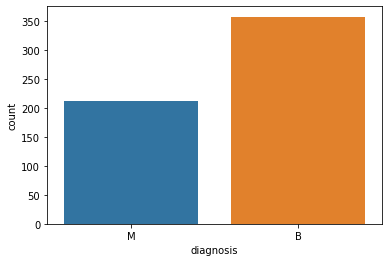

In [ ]:
sns.countplot(df['diagnosis'])

In [ ]:
df_x=df.drop(['diagnosis'],axis=1)
df_y=df['diagnosis']
df_y=df_y.replace('M',0)
df_y=df_y.replace('B',1)
df_y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
# 페어플랏 시각화

In [ ]:
df.drop(['diagnosis'],axis=1).corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
drop_col=pd.DataFrame()
drop_pval=pd.DataFrame()
for col in df_x:
  logit = sm.Logit(df_y,df[col]).fit()
  if logit.pvalues[0] > 0.05:
    print(col,'은 귀무가설을 기각할 수 없다. 즉, 타겟변수와 상관이 없다.')
    print('p_value :',logit.pvalues[0])
    col=pd.DataFrame([col])
    pval=pd.DataFrame([logit.pvalues[0]])
    drop_col=pd.concat([col,pval],axis=1)
    drop_pval=pd.concat([drop_col,drop_pval],axis=0)
    drop_col=pd.DataFrame()
drop_pval

Optimization terminated successfully.
         Current function value: 0.690213
         Iterations 3
radius_mean 은 귀무가설을 기각할 수 없다. 즉, 타겟변수와 상관이 없다.
p_value : 0.06818507904955258
Optimization terminated successfully.
         Current function value: 0.680047
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691154
         Iterations 3
perimeter_mean 은 귀무가설을 기각할 수 없다. 즉, 타겟변수와 상관이 없다.
p_value : 0.13258576822036103
Optimization terminated successfully.
         Current function value: 0.688148
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.672564
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692605
         Iterations 3
compactness_mean 은 귀무가설을 기각할 수 없다. 즉, 타겟변수와 상관이 없다.
p_value : 0.4325996465732751
Optimization terminated successfully.
         Current function value: 0.657745
         Iterations 5
Optimization terminated successfully.
         C

,0,0
0,perimeter_worst,0.684180
0,radius_worst,0.464744
0,concave points_se,0.304352
0,concavity_se,0.692692
0,compactness_se,0.276133
0,compactness_mean,0.432600
0,perimeter_mean,0.132586
0,radius_mean,0.068185


In [ ]:
df_x=df_x.drop(['perimeter_worst','radius_worst','concave points_se','concavity_se','compactness_se','compactness_mean','perimeter_mean','radius_mean'],axis=1)
df_x

,texture_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,1261.0,0.09780,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,858.1,0.08455,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,1265.0,0.11780,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df_x.describe()

,texture_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.289649,654.889104,0.096360,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.020542,0.003795,25.677223,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.301036,351.914129,0.014064,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.008266,0.002646,6.146258,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,9.710000,143.500000,0.052630,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.007882,0.000895,12.020000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,16.170000,420.300000,0.086370,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.015160,0.002248,21.080000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,18.840000,551.100000,0.095870,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.018730,0.003187,25.410000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,21.800000,782.700000,0.105300,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.023480,0.004558,29.720000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,39.280000,2501.000000,0.163400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.078950,0.029840,49.540000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_x.corr()

,texture_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
texture_mean,1.000000,0.321086,-0.023389,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.009127,0.054458,0.912045,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
area_mean,0.321086,1.000000,0.177028,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,-0.072497,-0.019887,0.287489,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.023389,0.177028,1.000000,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.200774,0.283607,0.036072,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
concavity_mean,0.302418,0.685983,0.521984,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.178009,0.449301,0.299879,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.293464,0.823269,0.553695,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.095351,0.257584,0.292752,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.071401,0.151293,0.557775,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.449137,0.331786,0.090651,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.076437,-0.283110,0.584792,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.345007,0.688132,-0.051269,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
radius_se,0.275869,0.732562,0.301467,0.631925,0.698050,0.303379,0.000111,1.000000,0.213247,0.972794,0.951830,0.164514,0.240567,0.227754,0.194799,0.751548,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559
texture_se,0.386358,-0.066280,0.068406,0.076218,0.021480,0.128053,0.164174,0.213247,1.000000,0.223171,0.111567,0.397243,0.411621,0.279723,0.409003,-0.083195,-0.073658,-0.092439,-0.068956,-0.119638,-0.128215,-0.045655
perimeter_se,0.281673,0.726628,0.296092,0.660391,0.710650,0.313893,0.039830,0.972794,0.223171,1.000000,0.937655,0.151075,0.266487,0.244143,0.200371,0.730713,0.130054,0.341919,0.418899,0.554897,0.109930,0.085433


In [ ]:
scaler=StandardScaler()
scale_x=pd.DataFrame(scaler.fit_transform(df_x),columns=df_x.columns)
scale_x

,texture_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(scale_x, df_y, test_size=0.2, random_state=2016251029)
print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

455
455
114
114


In [ ]:
x_sh=sklearn.utils.shuffle(train_x, random_state=2016251029)
y_sh=sklearn.utils.shuffle(train_y, random_state=2016251029)

train_x, train_y = RandomUnderSampler(random_state=2016251029).fit_resample(x_sh,y_sh)
print(len(train_x))
print(len(train_y))

330
330


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



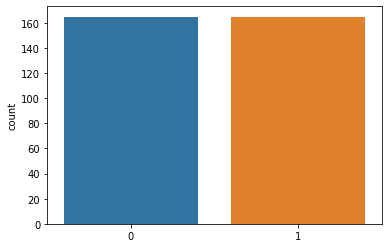

In [ ]:
sns.countplot(train_y)

In [ ]:
tree=DecisionTreeClassifier(random_state=2016251029)
tree.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2016251029, splitter='best')

In [ ]:
train_x=pd.DataFrame(train_x,columns=df_x.columns)
train_x

,texture_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.307894,3.478653,0.707364,3.077232,3.497170,0.063458,0.711976,1.776193,0.466552,2.235529,1.752720,0.375022,-1.197745,0.793608,1.293432,2.955784,1.092890,2.247704,1.801046,2.620403,-0.882913,1.172276
1,0.593484,1.049789,-1.611917,0.269940,0.228557,-0.151947,-1.332209,0.833828,0.159928,0.715785,0.792566,-0.503680,0.103849,0.469446,-0.159135,0.610729,-1.935293,-0.368739,-0.089658,-0.347109,-0.860264,-1.017757
2,0.695875,2.139081,1.447485,2.413074,2.767200,1.279223,0.462478,0.790518,-0.536961,0.639550,0.894434,-0.608684,-0.011175,0.088169,0.498754,2.110228,0.781656,2.019330,2.077863,1.942819,1.500078,0.928447
3,0.195555,0.084216,0.164372,-0.186433,0.094686,-0.823721,-0.507163,0.243723,0.041996,0.162836,0.111393,-0.441011,-0.780024,-0.646773,0.847240,0.452516,0.615079,-0.427264,0.092168,0.704897,0.207471,-0.098963
4,0.321217,1.831917,-0.341614,0.797249,1.356270,1.293826,-1.220218,1.546286,0.941910,1.139531,1.321487,-0.701021,0.922340,-0.406962,0.239833,1.343778,-0.993698,-0.005503,0.177564,0.710987,0.516467,-1.113072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,-0.853952,-0.841823,0.308838,-0.472686,-0.856596,0.180289,0.789944,-0.927466,-1.231674,-0.774752,-0.676334,-0.855694,-1.019759,0.331763,-1.030349,-0.786636,0.036445,0.862192,0.308536,-0.532112,-0.517295,1.332982
326,-0.260550,-0.061970,-2.177683,-0.804137,-0.907410,-0.644825,-0.983478,-0.632233,-0.993995,-0.596541,-0.435130,-1.290712,-1.151735,-0.695190,-0.067942,-0.107027,-1.662195,-0.238966,-0.555018,-0.598500,-0.428317,-0.398208
327,-0.374576,-0.532101,0.643316,-0.142993,-0.539846,-0.002259,1.165609,-0.824604,0.441152,-0.327740,-0.547998,0.986380,0.160756,0.835972,-0.450625,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440
328,-0.449042,-0.623681,1.860245,-0.370489,0.647967,0.742534,-0.573791,0.851874,1.952500,0.571731,0.187079,2.379770,0.755252,-0.299917,-1.088973,-0.717550,0.154802,-1.085159,-0.962664,-0.382891,-1.101313,-1.308690


In [ ]:
x_names=train_x.columns.tolist()
y_name=np.array(['Malignant', 'Benign'])
dot_data = export_graphviz(tree, filled=  True, rounded= True, class_names=y_name, feature_names=x_names, out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_jpg('무슨일이조.jpg')

True

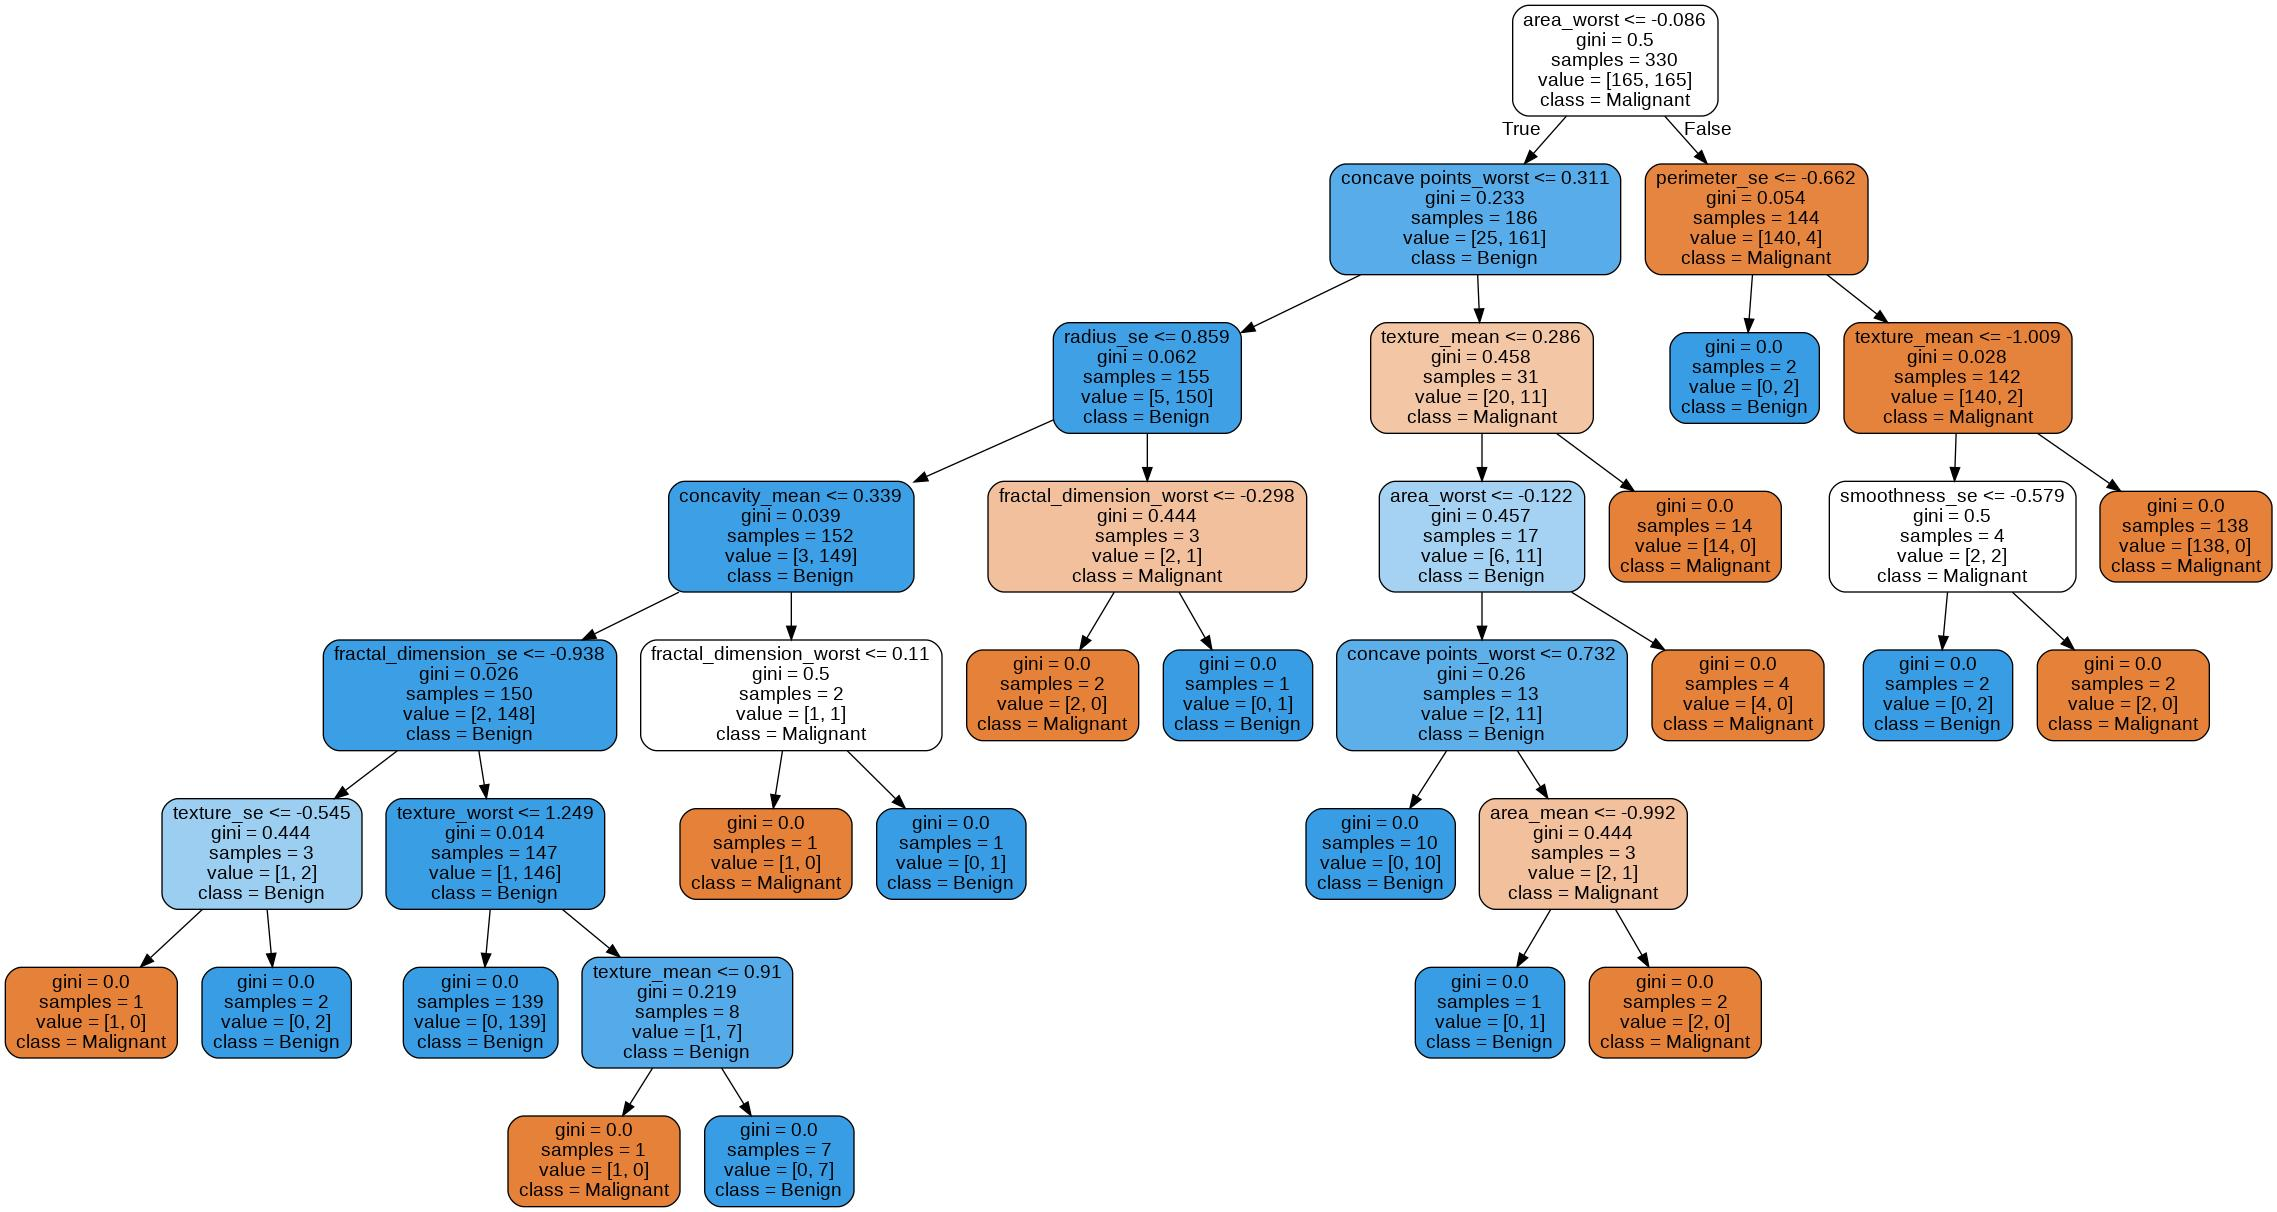

In [ ]:
dt_graph=pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_jpg())

In [ ]:
score=cross_validate(estimator = tree,
                     X=train_x, y=train_y, scoring='accuracy', cv=10, n_jobs=-1, return_train_score=True)
print('Accuracy : %s' % score['train_score'])
print('Accuracy : %s' % score['test_score'])
print('평균 Accuracy : % s' % score['test_score'].mean())

Accuracy : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy : [0.90909091 0.96969697 0.90909091 0.84848485 0.81818182 0.96969697
 0.87878788 0.87878788 0.93939394 0.87878788]
평균 Accuracy : 0.9


In [ ]:
cross_model = cross_val_predict(tree, train_x, train_y, cv=10)
print('Accuracy : %s' % accuracy_score(train_y, cross_model))

print('훈련 데이터 Accuracy : %s' % accuracy_score(train_y, cross_model))
print()

print('훈련 데이터 Precision : %s' % precision_score(train_y, cross_model))
print()

print('훈련 데이터 Recall : %s' % recall_score(train_y, cross_model))
print()

print('훈련 데이터 f1_score : %s' % f1_score(train_y, cross_model))
print()

print('훈련 데이터 roc_auc_score : %s' % roc_auc_score(train_y, cross_model))

Accuracy : 0.9
훈련 데이터 Accuracy : 0.9

훈련 데이터 Precision : 0.8975903614457831

훈련 데이터 Recall : 0.9030303030303031

훈련 데이터 f1_score : 0.9003021148036254

훈련 데이터 roc_auc_score : 0.9


In [ ]:
y_x=tree.predict(train_x)
y_pred=tree.predict(test_x)
print(y_pred)
print('훈련 데이터 Accuracy : %s' % accuracy_score(train_y, y_x))
print('테스트 데이터 Accuracy : %s' % accuracy_score(test_y, y_pred))
print()

print('훈련 데이터 Precision : %s' % precision_score(train_y, y_x))
print('테스트 데이터 Precision : %s' % precision_score(test_y, y_pred))
print()

print('훈련 데이터 Recall : %s' % recall_score(train_y, y_x))
print('테스트 데이터 Recall : %s' % recall_score(test_y, y_pred))
print()

print('훈련 데이터 f1_score : %s' % f1_score(train_y, y_x))
print('테스트 데이터 f1_score : %s' % f1_score(test_y, y_pred))
print()

print('훈련 데이터 roc_auc : %s' % roc_auc_score(train_y, y_x))
print('테스트 데이터 roc_auc : %s' % roc_auc_score(test_y, y_pred))

[0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 1]
훈련 데이터 Accuracy : 1.0
테스트 데이터 Accuracy : 0.9385964912280702

훈련 데이터 Precision : 1.0
테스트 데이터 Precision : 0.96875

훈련 데이터 Recall : 1.0
테스트 데이터 Recall : 0.9253731343283582

훈련 데이터 f1_score : 1.0
테스트 데이터 f1_score : 0.9465648854961832

훈련 데이터 roc_auc : 1.0
테스트 데이터 roc_auc : 0.9414099714194982


In [ ]:
con_mat=pd.DataFrame(confusion_matrix(test_y, y_pred), index=['실제Malignant', '실제Benign'],
                     columns=['예측Malignant', '예측Benign'])
con_mat

,예측Malignant,예측Benign
실제Malignant,45,2
실제Benign,5,62


In [ ]:
print('분류 Report')
print(classification_report(test_y,y_pred))

분류 Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        47
           1       0.97      0.93      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



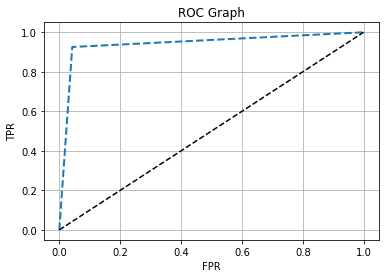

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y, y_pred)

plt.plot(fpr, tpr, '--', linewidth=2 )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Graph')
plt.grid()
plt.show()

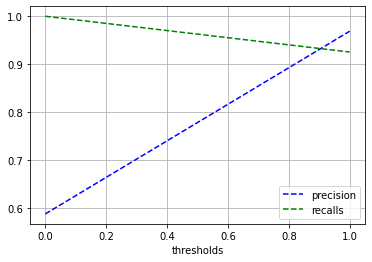

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(test_y, y_pred)
plt.plot(thresholds, precisions[:-1], "b--", label='precision')
plt.plot(thresholds, recalls[:-1], "g--", label='recalls')
plt.grid()
plt.legend()
plt.xlabel('thresholds')
plt.show()

In [ ]:
pipe = make_pipeline(DecisionTreeClassifier (random_state= 2016251029))
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

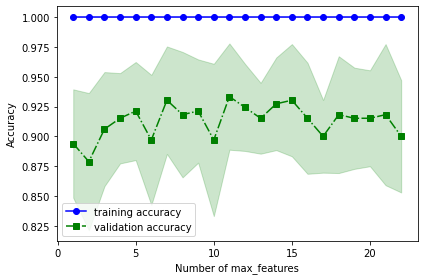

In [ ]:
ran=np.arange(1,23)

t_score, v_score = validation_curve(estimator= pipe, X=train_x, y=train_y, param_name='decisiontreeclassifier__max_features', param_range=ran, cv=10)

t_mean=np.mean(t_score, axis=1)
t_std=np.std(t_score, axis=1)

v_mean=np.mean(v_score, axis=1)
v_std=np.std(v_score, axis=1)

plt.plot(ran, t_mean, color='blue', marker='o', label='training accuracy')
plt.fill_between(ran, t_mean + t_std, t_mean - t_std, alpha=0.2, color='blue')
plt.plot(ran, v_mean, color='green', linestyle='dashdot', marker='s', label='validation accuracy')
plt.fill_between(ran, v_mean + v_std, v_mean - v_std, alpha=0.2, color='green')

plt.xlabel('Number of max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

In [ ]:
tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2016251029, splitter='best')>

In [ ]:
tree=DecisionTreeClassifier()
parameter=[{'criterion' : ['gini','entropy'], 'splitter' : ['best', 'random'], 'ccp_alpha' : [0, 0.5, 1], 'max_features' : np.arange(1,23)}]
grid=GridSearchCV(tree,parameter,cv=10,scoring='accuracy',return_train_score=True)
grid.fit(train_x,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'ccp_alpha': [0, 0.5, 1],
                         

In [ ]:
print('최적의 파라미터 :',grid.best_params_)
print('최적의 추정기 :',grid.best_estimator_)
print('최적의 점수 :', grid.best_score_)
print()
result=grid.cv_results_
for mean_score, params in zip(result['mean_test_score'], result['params']):
  print('평균 테스트 score :', mean_score)
  print('파라미터 종류 :', params)
  print() 

최적의 파라미터 : {'ccp_alpha': 0, 'criterion': 'entropy', 'max_features': 13, 'splitter': 'best'}
최적의 추정기 : DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
최적의 점수 : 0.9393939393939392

평균 테스트 score : 0.8454545454545453
파라미터 종류 : {'ccp_alpha': 0, 'criterion': 'gini', 'max_features': 1, 'splitter': 'best'}

평균 테스트 score : 0.8484848484848484
파라미터 종류 : {'ccp_alpha': 0, 'criterion': 'gini', 'max_features': 1, 'splitter': 'random'}

평균 테스트 score : 0.8818181818181818
파라미터 종류 : {'ccp_alpha': 0, 'criterion': 'gini', 'max_features': 2, 'splitter': 'best'}

평균 테스트 score : 0.8757575757575757
파라미터 종류 : {'ccp_alpha': 0, 'criterion': '

In [ ]:
hyper_model=grid.best_estimator_
hyper_pred=hyper_model.predict(test_x) # 이미 피팅 되어있는 상태라 fit할필요 없음
hyper_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

In [ ]:
x_names=train_x.columns.tolist()
y_name=np.array(['Malignant', 'Benign'])
dot_data = export_graphviz(hyper_model, filled=  True, rounded= True, class_names=y_name, feature_names=x_names, out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_jpg('무슨일이조_hyper.jpg')

True

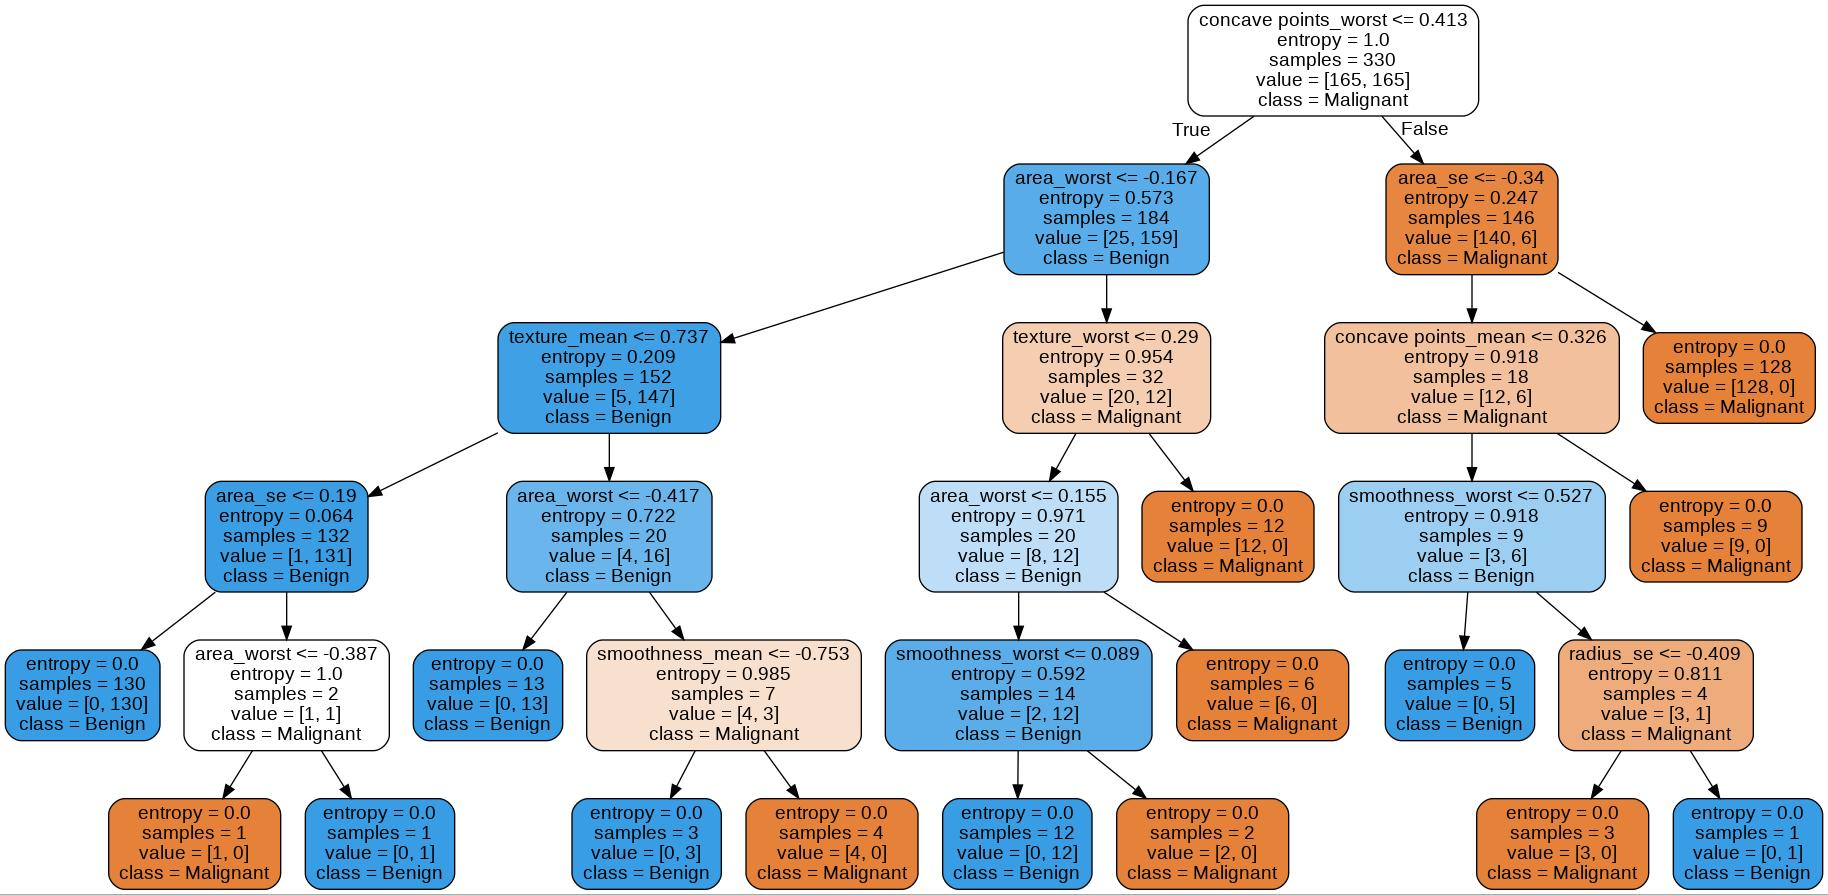

In [ ]:
dt_graph=pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_jpg())

In [ ]:
score=cross_validate(estimator = hyper_model,
                     X=train_x, y=train_y, scoring='accuracy', cv=10, n_jobs=-1, return_train_score=True)
print('Accuracy : %s' % score['train_score'])
print('Accuracy : %s' % score['test_score'])
print('평균 Accuracy : % s' % score['test_score'].mean())

Accuracy : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy : [0.93939394 0.93939394 0.87878788 0.87878788 0.90909091 1.
 1.         0.93939394 0.93939394 0.93939394]
평균 Accuracy : 0.9363636363636365


In [ ]:
cross_model = cross_val_predict(hyper_model, train_x, train_y, cv=10)
print('Accuracy : %s' % accuracy_score(train_y, cross_model))

print('훈련 데이터 Accuracy : %s' % accuracy_score(train_y, cross_model))
print()

print('훈련 데이터 Precision : %s' % precision_score(train_y, cross_model))
print()

print('훈련 데이터 Recall : %s' % recall_score(train_y, cross_model))
print()

print('훈련 데이터 f1_score : %s' % f1_score(train_y, cross_model))
print()

print('훈련 데이터 roc_auc_score : %s' % roc_auc_score(train_y, cross_model))

Accuracy : 0.9212121212121213
훈련 데이터 Accuracy : 0.9212121212121213

훈련 데이터 Precision : 0.9316770186335404

훈련 데이터 Recall : 0.9090909090909091

훈련 데이터 f1_score : 0.9202453987730062

훈련 데이터 roc_auc_score : 0.9212121212121213


In [ ]:
y_x=hyper_model.predict(train_x)
y_pred=hyper_model.predict(test_x)
print(y_pred)
print('훈련 데이터 Accuracy : %s' % accuracy_score(train_y, y_x))
print('테스트 데이터 Accuracy : %s' % accuracy_score(test_y, y_pred))
print()

print('훈련 데이터 Precision : %s' % precision_score(train_y, y_x))
print('테스트 데이터 Precision : %s' % precision_score(test_y, y_pred))
print()

print('훈련 데이터 Recall : %s' % recall_score(train_y, y_x))
print('테스트 데이터 Recall : %s' % recall_score(test_y, y_pred))
print()

print('훈련 데이터 f1_score : %s' % f1_score(train_y, y_x))
print('테스트 데이터 f1_score : %s' % f1_score(test_y, y_pred))
print()

print('훈련 데이터 roc_auc : %s' % roc_auc_score(train_y, y_x))
print('테스트 데이터 roc_auc : %s' % roc_auc_score(test_y, y_pred))

[0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1
 1 1 1]
훈련 데이터 Accuracy : 1.0
테스트 데이터 Accuracy : 0.956140350877193

훈련 데이터 Precision : 1.0
테스트 데이터 Precision : 1.0

훈련 데이터 Recall : 1.0
테스트 데이터 Recall : 0.9253731343283582

훈련 데이터 f1_score : 1.0
테스트 데이터 f1_score : 0.9612403100775194

훈련 데이터 roc_auc : 1.0
테스트 데이터 roc_auc : 0.9626865671641791


In [ ]:
con_mat=pd.DataFrame(confusion_matrix(test_y, y_pred), index=['실제Malignant', '실제Benign'],
                     columns=['예측Malignant', '예측Benign'])
con_mat

,예측Malignant,예측Benign
실제Malignant,47,0
실제Benign,5,62


In [ ]:
print('분류 Report')
print(classification_report(test_y,y_pred))

분류 Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.93      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



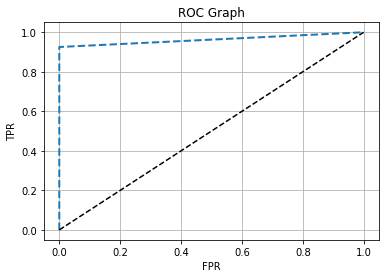

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y, y_pred)

plt.plot(fpr, tpr, '--', linewidth=2 )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Graph')
plt.grid()
plt.show()

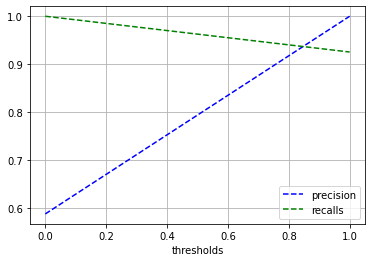

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(test_y, y_pred)
plt.plot(thresholds, precisions[:-1], "b--", label='precision')
plt.plot(thresholds, recalls[:-1], "g--", label='recalls')
plt.grid()
plt.legend()
plt.xlabel('thresholds')
plt.show()

In [ ]:
d={'Stats' : test_x.columns, 'F1' : hyper_model.feature_importances_}
d=pd.DataFrame(d)
d=d.sort_values(by='F1', ascending=0)
d_drop = d[d.Stats != '+/-']
fig =px.bar_polar(d_drop, r='F1', theta='Stats', color='Stats', template='plotly_dark',
                  color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.show()

In [ ]:
pd.DataFrame(hyper_model.feature_importances_,index=test_x.columns, columns=['변수중요도']).sort_values(by='변수중요도',ascending=False)

,변수중요도
concave points_worst,0.570922
area_worst,0.193645
area_se,0.078961
smoothness_worst,0.040312
texture_worst,0.033706
texture_mean,0.026677
concave points_mean,0.025044
smoothness_mean,0.020899
radius_se,0.009834
fractal_dimension_se,0.000000


In [ ]:
df=pd.read_csv('./data.csv')
df

# model = ols('weight ~ C(group)', df).fit()
# anova_lm(model)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df=df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df_x=df.drop(['diagnosis'],axis=1)
df_y=df['diagnosis']
df_y=df_y.replace('M',0)
df_y=df_y.replace('B',1)
drop_col=pd.DataFrame()
drop_pval=pd.DataFrame()
for col in df_x:
  logit = sm.Logit(df_y,df[col]).fit()
  if logit.pvalues[0] < 0.05:
    print('p_value :',logit.pvalues[0])
    col=pd.DataFrame([col])
    pval=pd.DataFrame([logit.pvalues[0]])
    drop_col=pd.concat([col,pval],axis=1)
    drop_pval=pd.concat([drop_col,drop_pval],axis=0)
    drop_col=pd.DataFrame()
drop_pval.columns=['변수','유의수준']
drop_pval.sort_values(by='유의수준',ascending=True)


Optimization terminated successfully.
         Current function value: 0.690213
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.680047
         Iterations 4
p_value : 0.000127945266683848
Optimization terminated successfully.
         Current function value: 0.691154
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.688148
         Iterations 3
p_value : 0.017789208498673312
Optimization terminated successfully.
         Current function value: 0.672564
         Iterations 4
p_value : 1.7081458017615241e-06
Optimization terminated successfully.
         Current function value: 0.692605
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.657745
         Iterations 5
p_value : 2.8901210698491656e-09
Optimization terminated successfully.
         Current function value: 0.656112
         Iterations 5
p_value : 9.218456220979166e-10
Optimization terminated 

,변수,유의수준
0,concave points_mean,9.218456e-10
0,smoothness_se,1.347580e-09
0,fractal_dimension_mean,1.948166e-09
0,concavity_mean,2.890121e-09
0,symmetry_se,2.236386e-08
0,texture_se,3.554538e-08
0,area_se,1.217907e-07
0,symmetry_mean,1.345930e-06
0,smoothness_mean,1.708146e-06
0,concavity_worst,1.390151e-05


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



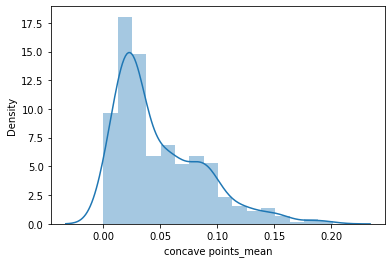

In [ ]:
df=pd.read_csv('./data.csv')
df=df.drop(['id','Unnamed: 32'],axis=1)
sns.distplot(df['concave points_mean'])

df_x=df.drop(['concave points_mean'],axis=1)
df_y=df['concave points_mean']
df_y=df_y.replace('M',0)
df_y=df_y.replace('B',1)


In [ ]:
pd.DataFrame(df.drop(['diagnosis'],axis=1).corr()['concave points_mean']).sort_values(by='concave points_mean', ascending=False)

,concave points_mean
concave points_mean,1.000000
concavity_mean,0.921391
concave points_worst,0.910155
perimeter_worst,0.855923
perimeter_mean,0.850977
compactness_mean,0.831135
radius_worst,0.830318
area_mean,0.823269
radius_mean,0.822529
area_worst,0.809630
